In [57]:
import pandas as pd
df = pd.read_csv(r"E:\fraud-anamoly-detection\data\processed\transactions_features.csv")
df.head()

,customer_id,amount,merchant_id,merchant_category,merchant_lat,merchant_long,distance_from_home,hour,day_of_week,month,is_fraud,time_since_last_txn_sec,txn_count_1h,txn_count_24h,avg_amount_24h,amount_deviation,travel_speed_kmh,hour_sin,hour_cos
0,CUST_00000,1044.99,MERCHANT_01868,jewelry,19.073305,72.872680,5.62,9,5,3,0,0.000000,1.0,1.0,1044.9900,0.0000,0.000000,0.707107,-0.707107
1,CUST_00000,1205.51,MERCHANT_00792,jewelry,19.055841,72.885882,4.45,11,5,3,0,5247.407530,1.0,2.0,1125.2500,80.2600,1.637352,0.258819,-0.965926
2,CUST_00000,127.99,MERCHANT_01036,luxury_goods,19.073716,72.885006,4.34,22,5,3,0,39591.723364,1.0,3.0,792.8300,-664.8400,0.180921,-0.500000,0.866025
3,CUST_00000,423.80,MERCHANT_01430,luxury_goods,19.084250,72.864179,6.72,7,6,3,0,33054.244721,1.0,4.0,700.5725,-276.7725,0.270355,0.965926,-0.258819
4,CUST_00000,644.50,MERCHANT_01181,jewelry,19.089023,72.890843,4.32,11,6,3,0,13527.966888,1.0,4.0,600.4500,44.0500,0.758879,0.258819,-0.965926


### Remove identity features from features

customer_id              DROP (identity leakage)
amount                   DEPENDS (raw vs derived) -- 1h and 24h converted
merchant_id              DROP (identity leakage)
merchant_category        DROP (categorical text)
merchant_lat             DROP (raw location)
merchant_long            DROP
distance_from_home       KEEP (behavioral)
hour                     TRANSFORMED ALREADY
day_of_week              DROP (raw categorical)
month                    DROP
is_fraud                 DROP (NOT for training)

In [58]:
candidate_features = [
    "amount_deviation",
    "avg_amount_24h",
    "txn_count_1h",
    "txn_count_24h",
    "time_since_last_txn_sec",
    "distance_from_home",
    "travel_speed_kmh",
    "hour_sin",
    "hour_cos"
]

X = df[candidate_features]
X.head()


,amount_deviation,avg_amount_24h,txn_count_1h,txn_count_24h,time_since_last_txn_sec,distance_from_home,travel_speed_kmh,hour_sin,hour_cos
0,0.0000,1044.9900,1.0,1.0,0.000000,5.62,0.000000,0.707107,-0.707107
1,80.2600,1125.2500,1.0,2.0,5247.407530,4.45,1.637352,0.258819,-0.965926
2,-664.8400,792.8300,1.0,3.0,39591.723364,4.34,0.180921,-0.500000,0.866025
3,-276.7725,700.5725,1.0,4.0,33054.244721,6.72,0.270355,0.965926,-0.258819
4,44.0500,600.4500,1.0,4.0,13527.966888,4.32,0.758879,0.258819,-0.965926


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amount_deviation         100000 non-null  float64
 1   avg_amount_24h           100000 non-null  float64
 2   txn_count_1h             100000 non-null  float64
 3   txn_count_24h            100000 non-null  float64
 4   time_since_last_txn_sec  100000 non-null  float64
 5   distance_from_home       100000 non-null  float64
 6   travel_speed_kmh         100000 non-null  float64
 7   hour_sin                 100000 non-null  float64
 8   hour_cos                 100000 non-null  float64
dtypes: float64(9)
memory usage: 6.9 MB


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              100000 non-null  object 
 1   amount                   100000 non-null  float64
 2   merchant_id              100000 non-null  object 
 3   merchant_category        100000 non-null  object 
 4   merchant_lat             100000 non-null  float64
 5   merchant_long            100000 non-null  float64
 6   distance_from_home       100000 non-null  float64
 7   hour                     100000 non-null  int64  
 8   day_of_week              100000 non-null  int64  
 9   month                    100000 non-null  int64  
 10  is_fraud                 100000 non-null  int64  
 11  time_since_last_txn_sec  100000 non-null  float64
 12  txn_count_1h             100000 non-null  float64
 13  txn_count_24h            100000 non-null  float64
 14  avg_a

In [61]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_deviation,100000.0,-0.148409,267.484749,-4021.7275,-90.930625,0.000000e+00,89.493125,4.877142e+03
avg_amount_24h,100000.0,803.875079,569.258922,10.0000,424.640000,6.559787e+02,1008.718750,7.391995e+03
txn_count_1h,100000.0,1.119760,0.351225,1.0000,1.000000,1.000000e+00,1.000000,5.000000e+00
txn_count_24h,100000.0,3.612280,2.080110,1.0000,2.000000,3.000000e+00,5.000000,1.600000e+01
time_since_last_txn_sec,100000.0,48035.912954,254321.541602,0.0000,6877.687544,1.958452e+04,44337.421745,7.437694e+06
distance_from_home,100000.0,69.835448,258.862620,2.1500,6.380000,7.830000e+00,9.400000,1.968310e+03
travel_speed_kmh,100000.0,81.041161,760.629263,0.0000,0.144031,4.282471e-01,1.831808,2.000000e+04
hour_sin,100000.0,-0.002338,0.707365,-1.0000,-0.707107,0.000000e+00,0.707107,1.000000e+00
hour_cos,100000.0,-0.003264,0.706844,-1.0000,-0.707107,-1.836970e-16,0.707107,1.000000e+00


In [62]:
X.isnull().sum()

amount_deviation           0
avg_amount_24h             0
txn_count_1h               0
txn_count_24h              0
time_since_last_txn_sec    0
distance_from_home         0
travel_speed_kmh           0
hour_sin                   0
hour_cos                   0
dtype: int64

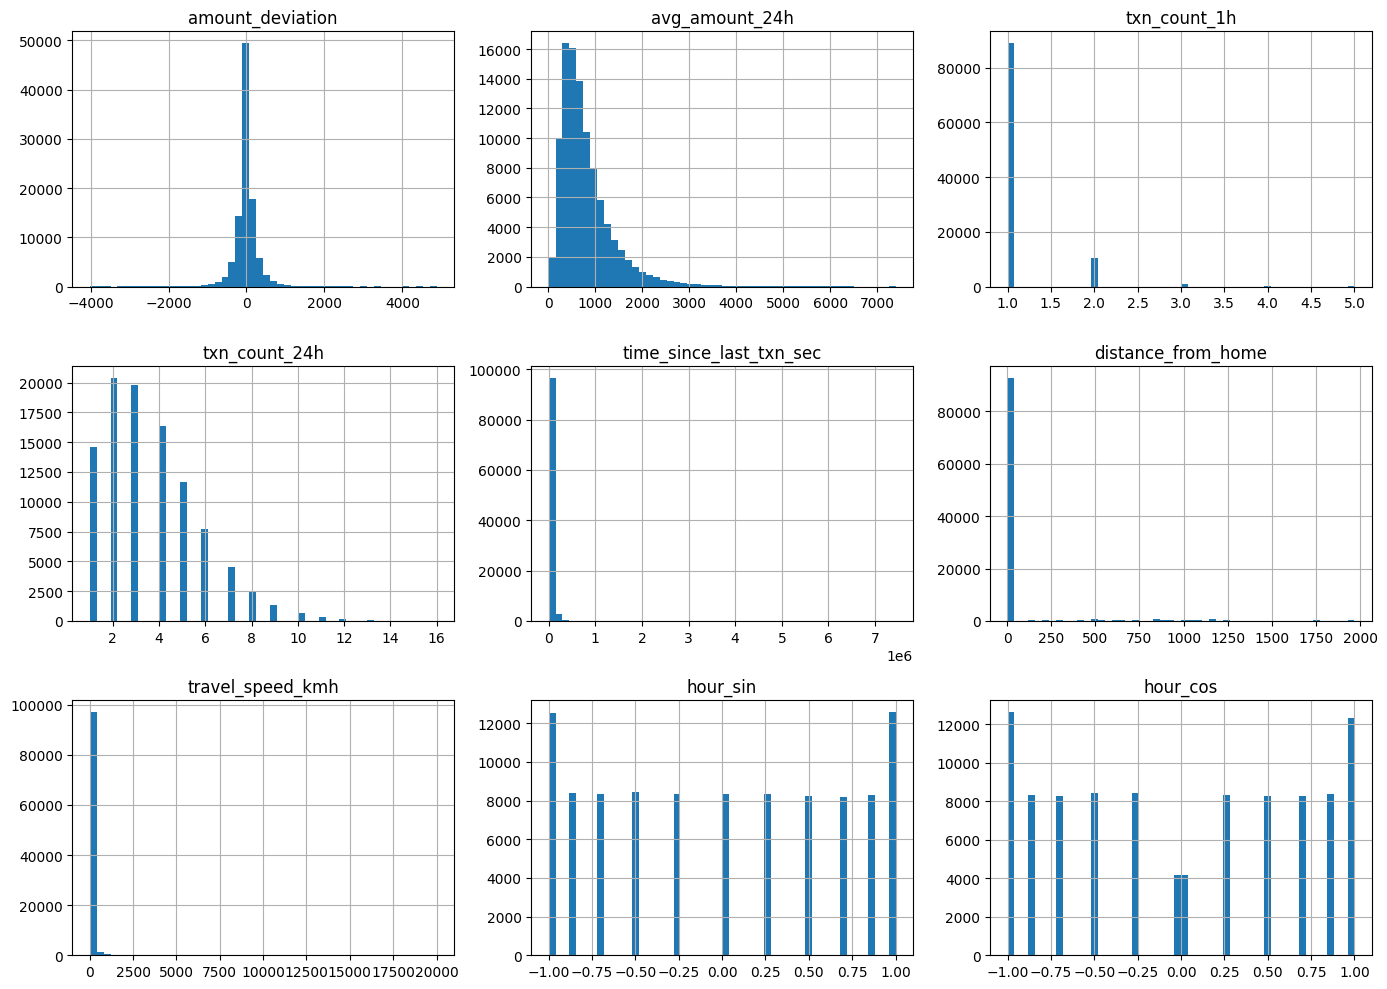

In [63]:
import matplotlib.pyplot as plt

X.hist(bins=50, figsize=(14, 10))
plt.tight_layout()
plt.show()

In [64]:
from pathlib import Path

out = Path("E:/fraud-anamoly-detection") / "data" / "processed" / "transactions_model_matrix.csv"
out.parent.mkdir(parents=True, exist_ok=True)
X.to_csv(out, index=False)
print(f"Saved → {out}")

Saved → E:\fraud-anamoly-detection\data\processed\transactions_model_matrix.csv


## amount_deviation to amount_dev_log

In [65]:
amount_dev = df["amount_deviation"]

In [66]:
amount_dev.describe()

count    100000.000000
mean         -0.148409
std         267.484749
min       -4021.727500
25%         -90.930625
50%           0.000000
75%          89.493125
max        4877.141667
Name: amount_deviation, dtype: float64

In [67]:
import numpy as np
np.percentile(amount_dev, [50, 75, 90, 95, 99])

array([  0.      ,  89.493125, 251.9475  , 392.893875, 787.638045])

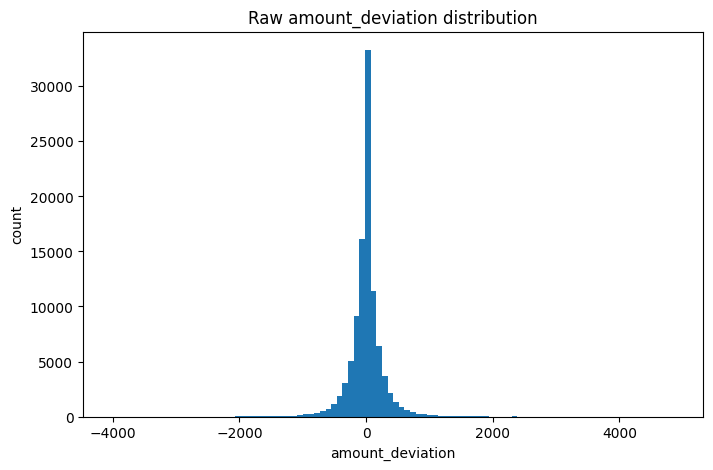

In [68]:
plt.figure(figsize=(8,5))
plt.hist(amount_dev, bins=100)
plt.title("Raw amount_deviation distribution")
plt.xlabel("amount_deviation")
plt.ylabel("count")
plt.show()


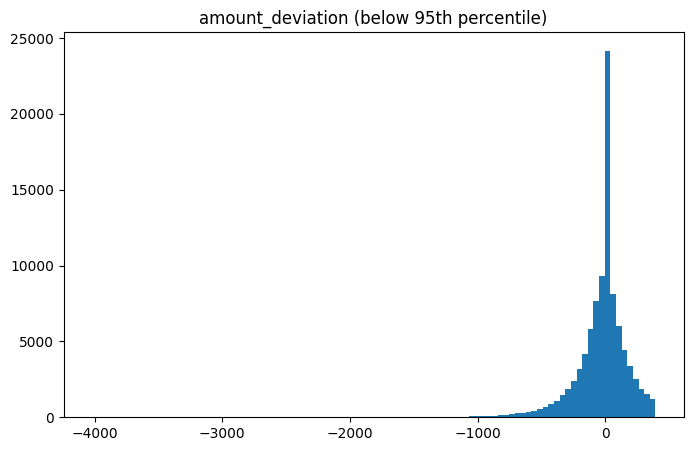

In [69]:
plt.figure(figsize=(8,5))
plt.hist(amount_dev[amount_dev < np.percentile(amount_dev, 95)], bins=100)
plt.title("amount_deviation (below 95th percentile)")
plt.show()

In [70]:
total = len(amount_dev)
extreme = (amount_dev > np.percentile(amount_dev, 99)).sum()

print(f"Total transactions: {total}")
print(f"Extreme deviations (>99th percentile): {extreme}")
print(f"Percentage: {extreme/total*100:.2f}%")


Total transactions: 100000
Extreme deviations (>99th percentile): 1000
Percentage: 1.00%


In [71]:
amount_dev_log = np.sign(amount_dev) * np.log1p(np.abs(amount_dev))

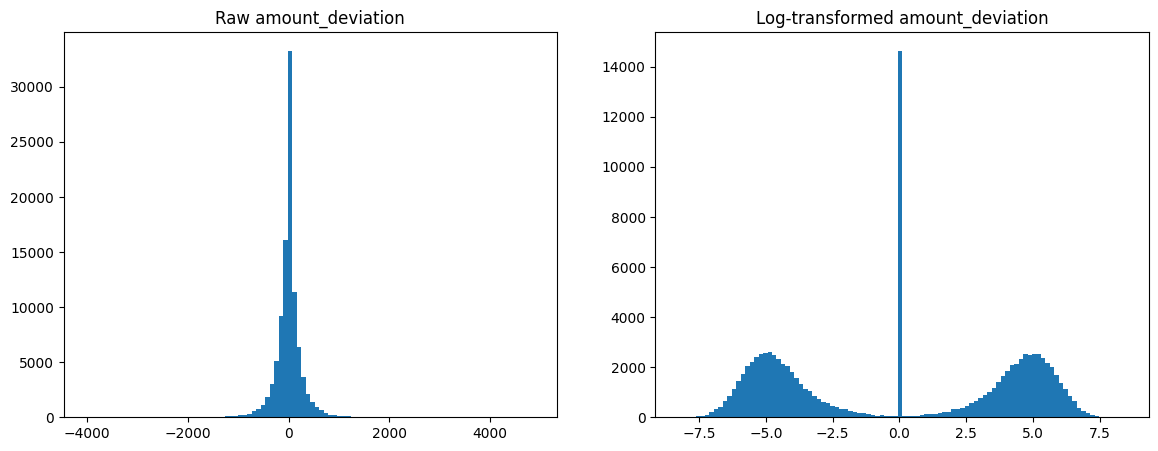

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].hist(amount_dev, bins=100)
axes[0].set_title("Raw amount_deviation")

axes[1].hist(amount_dev_log, bins=100)
axes[1].set_title("Log-transformed amount_deviation")

plt.show()

In [73]:
print("Raw range:", amount_dev.min(), amount_dev.max())
print("Log range:", amount_dev_log.min(), amount_dev_log.max())

Raw range: -4021.7275 4877.1416666666655
Log range: -8.299715434134878 8.492519620311242


In [74]:
df["amount_dev_log"] = np.sign(df["amount_deviation"]) * np.log1p(
    np.abs(df["amount_deviation"])
)

In [75]:
df[["amount_deviation", "amount_dev_log"]].describe()

,amount_deviation,amount_dev_log
count,100000.000000,100000.000000
mean,-0.148409,-0.005369
std,267.484749,4.424405
min,-4021.727500,-8.299715
25%,-90.930625,-4.521034
50%,0.000000,0.000000
75%,89.493125,4.505274
max,4877.141667,8.492520


amount_deviation       Axes(0.125,0.11;0.352273x0.77)
amount_dev_log      Axes(0.547727,0.11;0.352273x0.77)
dtype: object

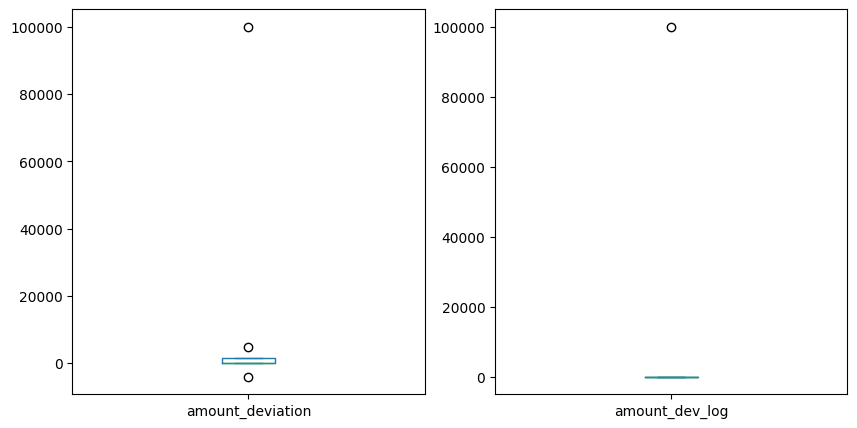

In [76]:
df[["amount_deviation", "amount_dev_log"]].describe().plot(kind='box', subplots=True, layout=(1,2), figsize=(10,5))

In [77]:
MODEL_FEATURES = [
    "amount_dev_log",          # replaced amount_deviation with log-transformed version
    "avg_amount_24h",
    "txn_count_1h",
    "txn_count_24h",
    "time_since_last_txn_sec",
    "distance_from_home",
    "travel_speed_kmh",
    "hour_sin",
    "hour_cos"
]


In [78]:
X = df[MODEL_FEATURES]

In [79]:
X.info()
X.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amount_dev_log           100000 non-null  float64
 1   avg_amount_24h           100000 non-null  float64
 2   txn_count_1h             100000 non-null  float64
 3   txn_count_24h            100000 non-null  float64
 4   time_since_last_txn_sec  100000 non-null  float64
 5   distance_from_home       100000 non-null  float64
 6   travel_speed_kmh         100000 non-null  float64
 7   hour_sin                 100000 non-null  float64
 8   hour_cos                 100000 non-null  float64
dtypes: float64(9)
memory usage: 6.9 MB


amount_dev_log             0
avg_amount_24h             0
txn_count_1h               0
txn_count_24h              0
time_since_last_txn_sec    0
distance_from_home         0
travel_speed_kmh           0
hour_sin                   0
hour_cos                   0
dtype: int64

In [80]:
X.to_csv("E:/fraud-anamoly-detection/data/processed/transactions_model_matrix_v2.csv", index=False)
